In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [12]:
data = pd.read_csv('Titanic-Train-Data (2).csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
data=data.drop(['Ticket','Cabin','Name'],axis=1)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [18]:
data['Age'].median()

28.0

In [19]:
data['Age']=data['Age'].fillna(value=28)
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [20]:
data['Age'].isna().sum()

0

In [21]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [22]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
g=data.groupby('Survived')
g['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [24]:
data['Embarked']=data['Embarked'].fillna(value='S')
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [25]:
from sklearn import preprocessing
label_encoder =preprocessing.LabelEncoder()
data['Embarked']= label_encoder.fit_transform(data['Embarked'])
data['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


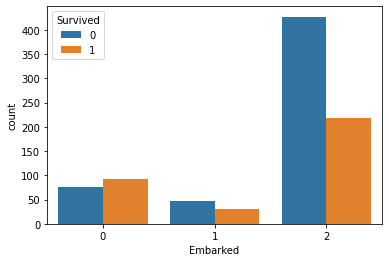

In [26]:
sns.countplot(data['Embarked'],hue=data['Survived'])
plt.show()

In [27]:
data['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [28]:
data


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,2
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,2
3,4,1,1,female,35.0,1,0,53.1000,2
4,5,0,3,male,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,2
887,888,1,1,female,19.0,0,0,30.0000,2
888,889,0,3,female,28.0,1,2,23.4500,2
889,890,1,1,male,26.0,0,0,30.0000,0


In [29]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.162098
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,-0.018754,0.068230,0.039798,-0.224719,1.000000


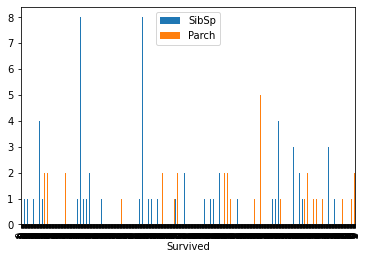

In [30]:
data.plot(x='Survived',y=['SibSp','Parch'],kind='bar')
plt.show()

In [31]:
correlation=data.corr()
correlation['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Name: Survived, dtype: float64

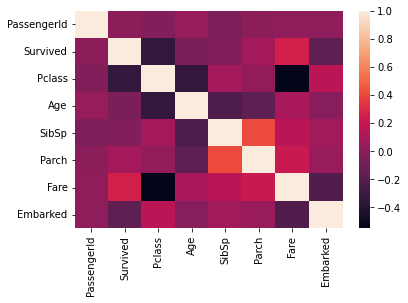

In [32]:
sns.heatmap(data.corr())

In [33]:
correlation['Fare'].sort_values(ascending=False)
correlation['Fare']

PassengerId    0.012658
Survived       0.257307
Pclass        -0.549500
Age            0.096688
SibSp          0.159651
Parch          0.216225
Fare           1.000000
Embarked      -0.224719
Name: Fare, dtype: float64

In [34]:
data.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,2
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,2
3,4,1,1,female,35.0,1,0,53.1000,2
4,5,0,3,male,35.0,0,0,8.0500,2


In [35]:
data['family']=data['SibSp']=data['Parch']+1
dat=data.drop(['SibSp'],axis=1)
data=data.drop('PassengerId',axis=1)
data=data.drop('Embarked',axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,1,0,7.9250,1
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,1,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,1,0,13.0000,1
887,1,1,female,19.0,1,0,30.0000,1
888,0,3,female,28.0,3,2,23.4500,3
889,1,1,male,26.0,1,0,30.0000,1


In [36]:
x=data.drop('Survived',axis=1).values
y=data['Survived'].values

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [39]:
from sklearn.metrics import accuracy_score